# How are in-demand skills trending for Data Analytics ? 

In [48]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [50]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [51]:
df_DA=df[df['job_title_short'] == 'Data Analyst'].copy()

In [52]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

In [53]:
df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10


In [54]:
df_DA_explode=df_DA.explode('job_skills')
df_DA_explode.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [55]:
df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [56]:
df_DA_pivot=df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total']=df_DA_pivot.sum()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [57]:
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


In [58]:
df_DA_pivot=df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


In [59]:
DA_totals=df_DA.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
dtype: int64

In [60]:
df_DA_perc=df_DA_pivot.div(DA_totals/100,axis=0)
df_DA_perc

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.064448,34.640661,28.009328,23.726945,18.168327,15.293619,16.239135,7.971168,7.538690,5.304219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00424,0.00424,0.00000,0.000000,0.000000
2,47.994927,34.859283,28.693079,23.770987,19.972219,15.557434,15.907718,7.796835,7.458630,5.761565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
3,48.439328,34.938127,29.187958,24.939974,19.553038,16.314720,15.723696,7.794127,7.406267,5.491596,...,0.006156,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.006156
4,48.685059,35.426067,29.373469,24.339306,20.020627,15.463452,16.746165,7.670491,7.586696,6.104164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.006446,0.000000
5,49.295985,35.558370,30.321091,24.174924,20.077479,15.592639,14.452805,7.293452,7.129554,6.339864,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00745,0.000000,0.000000
6,47.376312,35.757121,29.404048,23.813093,20.458521,15.254873,13.580710,7.327586,7.727386,6.165667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
7,47.760174,34.252874,30.015533,24.405095,20.813917,15.184840,13.159366,6.809568,6.641814,6.188257,...,0.000000,0.000000,0.006213,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
8,47.364183,34.797080,29.933434,24.334335,20.716126,15.970582,13.742753,7.150526,6.968005,5.996350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
9,45.620950,32.640791,28.251720,23.020910,20.829715,14.336295,12.559289,6.306366,6.313047,5.691763,...,0.000000,0.006680,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000


In [61]:
df_DA_perc=df_DA_perc.reset_index()
df_DA_perc['job_posted_month']=df_DA_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(int(x)),format='%m').strftime('%b'))
df_DA_perc=df_DA_perc.set_index('job_posted_month')
df_DA_perc=df_DA_perc.drop(columns='job_posted_month_no')
df_DA_perc

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.064448,34.640661,28.009328,23.726945,18.168327,15.293619,16.239135,7.971168,7.538690,5.304219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00424,0.00424,0.00000,0.000000,0.000000
Feb,47.994927,34.859283,28.693079,23.770987,19.972219,15.557434,15.907718,7.796835,7.458630,5.761565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
Mar,48.439328,34.938127,29.187958,24.939974,19.553038,16.314720,15.723696,7.794127,7.406267,5.491596,...,0.006156,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.006156
Apr,48.685059,35.426067,29.373469,24.339306,20.020627,15.463452,16.746165,7.670491,7.586696,6.104164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.006446,0.000000
May,49.295985,35.558370,30.321091,24.174924,20.077479,15.592639,14.452805,7.293452,7.129554,6.339864,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00745,0.000000,0.000000
Jun,47.376312,35.757121,29.404048,23.813093,20.458521,15.254873,13.580710,7.327586,7.727386,6.165667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
Jul,47.760174,34.252874,30.015533,24.405095,20.813917,15.184840,13.159366,6.809568,6.641814,6.188257,...,0.000000,0.000000,0.006213,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
Aug,47.364183,34.797080,29.933434,24.334335,20.716126,15.970582,13.742753,7.150526,6.968005,5.996350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
Sep,45.620950,32.640791,28.251720,23.020910,20.829715,14.336295,12.559289,6.306366,6.313047,5.691763,...,0.000000,0.006680,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000


In [62]:
df_DA_perc.iloc[:,:5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,48.064448,34.640661,28.009328,23.726945,18.168327
Feb,47.994927,34.859283,28.693079,23.770987,19.972219
Mar,48.439328,34.938127,29.187958,24.939974,19.553038
Apr,48.685059,35.426067,29.373469,24.339306,20.020627
May,49.295985,35.558370,30.321091,24.174924,20.077479
Jun,47.376312,35.757121,29.404048,23.813093,20.458521
Jul,47.760174,34.252874,30.015533,24.405095,20.813917
Aug,47.364183,34.797080,29.933434,24.334335,20.716126
Sep,45.620950,32.640791,28.251720,23.020910,20.829715


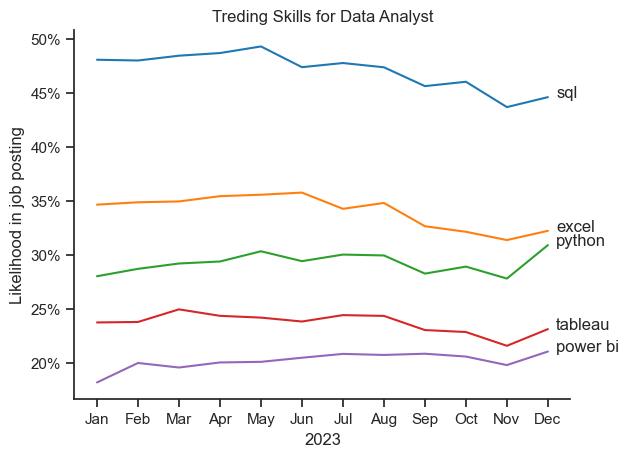

In [73]:
df_plot=df_DA_perc.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
plt.title('Treding Skills for Data Analyst')
plt.ylabel('Likelihood in job posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])
sns.despine()
plt.show()